In [1]:
import os
import pandas as pd
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# DATA

In [2]:
puidata = os.getenv("PUIDATA")
if puidata is None:
    os.environ["PUIDATA"] = "%s/PUIdata"%os.getenv("HOME")
    puidata = os.getenv("PUIDATA")

In [3]:
!curl https://raw.githubusercontent.com/fedhere/PUI2018_fb55/master/HW9_fb55/World%20firearms%20murders%20and%20ownership%20-%20Sheet%201.csv > firearms_murders_and_ownership.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  7852  100  7852    0     0   7852      0  0:00:01 --:--:--  0:00:01 30084


In [4]:
!mv firearms_murders_and_ownership.csv $PUIDATA

In [82]:
fmo = pd.read_csv("%s/firearms_murders_and_ownership.csv"%os.getenv("PUIDATA"))

In [83]:
fmo.head()

,Country/Territory,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms
0,Albania,AL,CTS,65.9,56.0,1.76,70.0,8.6,270000.0
1,Algeria,DZ,CTS,4.8,20.0,0.06,78.0,7.6,1900000.0
2,Angola,AO,NaN,NaN,NaN,NaN,34.0,17.3,2800000.0
3,Anguilla,AI,WHO-MDB,24.0,1.0,7.14,NaN,NaN,NaN
4,Argentina,AR,Ministry of Justice,52.0,1198.0,3.02,62.0,10.2,3950000.0


In [14]:
!curl http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=csv > world_bank_population.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 79715  100 79715    0     0  79715      0  0:00:01 --:--:--  0:00:01  196k


In [15]:
!mv world_bank_population.zip $PUIDATA

In [17]:
os.system("unzip " + os.getenv("PUIDATA") + "/world_bank_population.zip -d "+ os.getenv("PUIDATA"))

256

In [84]:
pop = pd.read_csv("%s/API_SP.POP.TOTL_DS2_en_csv_v2_10224786.csv"%os.getenv("PUIDATA"), skiprows=3)

In [85]:
pop.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0,NaN


In [86]:
cols_to_drop_pop = [i for i in pop.columns.values if i != 'Country Name' and i != '2012']
pop.drop(cols_to_drop_pop, axis=1, inplace=True)

In [87]:
pop.head()

,Country Name,2012
0,Aruba,102577.0
1,Afghanistan,30696958.0
2,Angola,25096150.0
3,Albania,2900401.0
4,Andorra,82431.0


In [88]:
mass_shoot = pd.read_csv("%s/data-pvLFI.csv"%os.getenv("PUIDATA"))

In [89]:
mass_shoot.head()

,Country,Guns per 100 inhabitants,Number of mass shootings (1983-2013)
0,Australia,15.0,4
1,Austria,30.4,1
2,Belgium,17.2,2
3,Canada,30.8,4
4,Denmark,12.0,0


In [38]:
!curl http://api.worldbank.org/v2/en/indicator/NY.GDP.MKTP.CD?downloadformat=csv > world_bank_gdp.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  113k  100  113k    0     0   113k      0  0:00:01 --:--:--  0:00:01  271k


In [39]:
!mv world_bank_gdp.zip $PUIDATA

In [40]:
os.system("unzip " + os.getenv("PUIDATA") + "/world_bank_gpd.zip -d "+ os.getenv("PUIDATA"))

2304

In [90]:
gdp = pd.read_csv("%s/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10224782.csv"%os.getenv("PUIDATA"), skiprows=3)

In [91]:
gdp.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.026425e+10,2.061610e+10,1.921556e+10,1.946902e+10,2.081530e+10,NaN
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,7.549239e+10,8.252614e+10,1.041158e+11,1.139232e+11,1.249125e+11,1.267302e+11,1.026212e+11,9.533720e+10,1.242094e+11,NaN
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.138693e+10,1.188368e+10,1.303935e+10,NaN
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.012914e+09,NaN


In [92]:
cols_to_drop_gdp = [i for i in gdp.columns.values if i != 'Country Name' and i != '2012']
gdp.drop(cols_to_drop_gdp, axis=1, inplace=True)

In [93]:
gdp.head()

,Country Name,2012
0,Aruba,NaN
1,Afghanistan,2.053654e+10
2,Angola,1.139232e+11
3,Albania,1.231978e+10
4,Andorra,3.164615e+09


In [94]:
df_pop_gdp = pop.merge(gdp, right_on="Country Name", left_on="Country Name")
df_pop_gdp.rename(index=str, columns={"2012_x": "pop", "2012_y": "gdp"}, inplace=True)
df_pop_gdp.head()

,Country Name,pop,gdp
0,Aruba,102577.0,NaN
1,Afghanistan,30696958.0,2.053654e+10
2,Angola,25096150.0,1.139232e+11
3,Albania,2900401.0,1.231978e+10
4,Andorra,82431.0,3.164615e+09


In [95]:
fmo = fmo.merge(df_pop_gdp, right_on='Country Name', left_on='Country/Territory')

In [96]:
fmo.head()

,Country/Territory,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms,Country Name,pop,gdp
0,Albania,AL,CTS,65.9,56.0,1.76,70.0,8.6,270000.0,Albania,2900401.0,1.231978e+10
1,Algeria,DZ,CTS,4.8,20.0,0.06,78.0,7.6,1900000.0,Algeria,37565847.0,2.090590e+11
2,Angola,AO,NaN,NaN,NaN,NaN,34.0,17.3,2800000.0,Angola,25096150.0,1.139232e+11
3,Argentina,AR,Ministry of Justice,52.0,1198.0,3.02,62.0,10.2,3950000.0,Argentina,42096739.0,5.459824e+11
4,Armenia,AM,CTS,13.0,9.0,0.29,52.0,12.5,380000.0,Armenia,2881922.0,1.061932e+10


In [97]:
cols_to_drop_fmo = [i for i in fmo.columns.values if i != 'Country/Territory' and i != 'Average total all civilian firearms' and i != 'pop' and i != 'gdp' and i != 'Number of homicides by firearm']
fmo.drop(cols_to_drop_fmo, axis=1, inplace=True)

In [98]:
fmo.head()

,Country/Territory,Number of homicides by firearm,Average total all civilian firearms,pop,gdp
0,Albania,56.0,270000.0,2900401.0,1.231978e+10
1,Algeria,20.0,1900000.0,37565847.0,2.090590e+11
2,Angola,NaN,2800000.0,25096150.0,1.139232e+11
3,Argentina,1198.0,3950000.0,42096739.0,5.459824e+11
4,Armenia,9.0,380000.0,2881922.0,1.061932e+10


In [99]:
fmo = fmo.merge(mass_shoot, right_on="Country", left_on="Country/Territory")
fmo

,Country/Territory,Number of homicides by firearm,Average total all civilian firearms,pop,gdp,Country,Guns per 100 inhabitants,Number of mass shootings (1983-2013)
0,Australia,30.0,3050000.0,22742475.0,1.543411e+12,Australia,15.0,4
1,Austria,18.0,2500000.0,8429991.0,4.094252e+11,Austria,30.4,1
2,Belgium,70.0,1800000.0,11128246.0,4.978842e+11,Belgium,17.2,2
3,Canada,173.0,9950000.0,34750545.0,1.824289e+12,Canada,30.8,4
4,Denmark,15.0,650000.0,5591572.0,3.271489e+11,Denmark,12.0,0
5,Finland,24.0,2400000.0,5413971.0,2.567065e+11,Finland,45.3,2
6,France,35.0,19000000.0,65659789.0,2.683825e+12,France,31.2,6
7,Germany,158.0,25000000.0,80425823.0,3.543984e+12,Germany,30.3,7
8,Greece,29.0,2500000.0,11045011.0,2.456707e+11,Greece,22.5,0
9,Hungary,7.0,560000.0,9920362.0,1.278566e+11,Hungary,5.5,0


# 2 EXPLORATION

## 2.1. Plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors

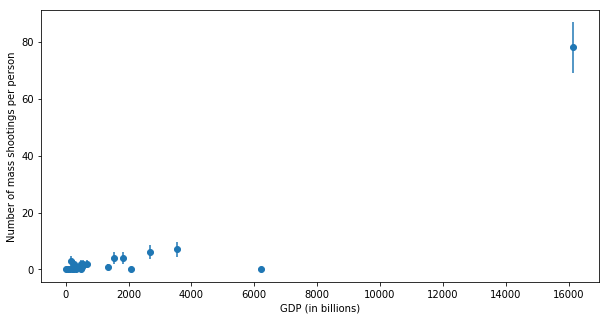

Number of mass shooting vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has both the highest GDP and the highest number of mass shootings


In [117]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(fmo.gdp / 1e9, fmo['Number of mass shootings (1983-2013)'])
ax.errorbar(fmo.gdp / 1e9, fmo['Number of mass shootings (1983-2013)'], 
            yerr = np.sqrt(fmo['Number of mass shootings (1983-2013)'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Number of mass shootings per person")
ax.set_ylim()
pl.show()
print ("Number of mass shooting vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has both the highest GDP and the highest number of mass shootings")


Are there any points that look like they may be outilers?
Yes, I think that definitely the last point at 16000 GDP and ~80 mass shootings per person (USA) seems like an outlier of the global population

## 2.2. Plot the average number of civilian fire arms per person

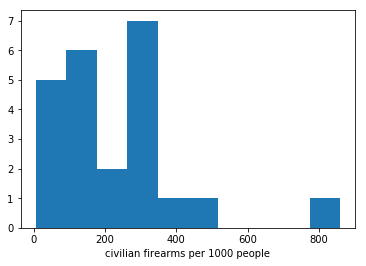

In [113]:
fmo['shootingspp'] = fmo["Number of mass shootings (1983-2013)"] / fmo['pop'] * 1000

fig, ax = plt.subplots()
ax.hist(fmo['Average total all civilian firearms']/fmo['pop']*1000)
ax.set_xlabel('civilian firearms per 1000 people');

## 2.3. Plot the average number of homicide by fire arms per person

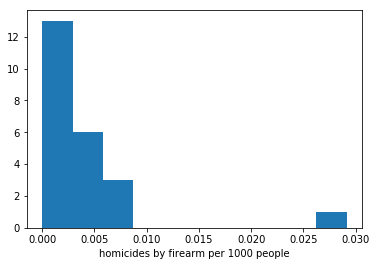

In [103]:
fig, ax = plt.subplots()
ax.hist(fmo['Number of homicides by firearm'] / fmo['pop'] * 1000)
ax.set_xlabel('homicides by firearm per 1000 people');

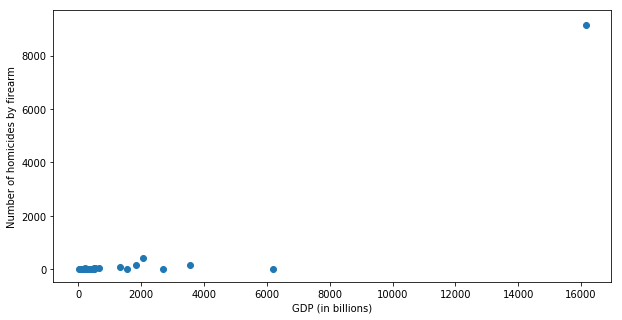

Number of homicides by firearm vs GDP, errors represent Poisson statistics.
The datapoint to the right of the plot is the USA, which has the highest GDP and the highest number of homicides per 1000 people


In [121]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(fmo.gdp / 1e9, fmo['Number of homicides by firearm'])
ax.errorbar(fmo.gdp / 1e9, fmo['Number of homicides by firearm'], 
            yerr = np.sqrt(fmo['Number of homicides by firearm'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Number of homicides by firearm")
ax.set_ylim()
pl.show()
print ("Number of homicides by firearm vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the right of the plot is the USA, " + 
       "which has the highest GDP and the highest number of homicides per 1000 people")


Are there points that look like outliers? Again the USA seems like an outlier against the population

## 2.4. plot the number of homicides by fire arm against the number of civilian firearms. plot the US in a different color

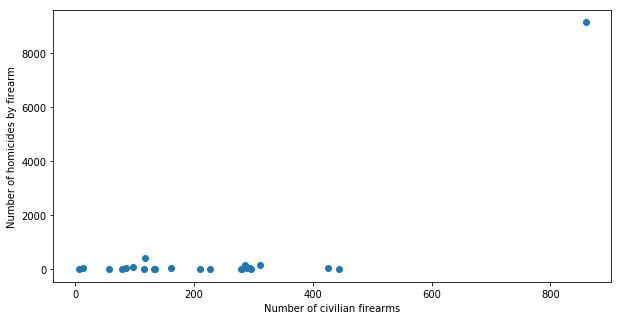

Number of homicides by firearm people vs number of civilian firearms, with no error bars. The datapoint to the right of the plot is the USA, which has the highest number of civilian firearms and the highest number of homicides


In [125]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(fmo['Average total all civilian firearms']/ fmo['pop'] * 1000, fmo['Number of homicides by firearm'])
#ax.errorbar(fmo['Average total all civilian firearms']/ fmo['pop'] * 1000, fmo['Number of homicides by firearm'], 
            #yerr = np.sqrt(fmo['Number of homicides by firearm'] * 1.0), fmt = '.')
ax.set_xlabel("Number of civilian firearms")
ax.set_ylabel("Number of homicides by firearm")
ax.set_ylim()
pl.show()
print ("Number of homicides by firearm people vs number of civilian firearms, " + 
       "with no error bars. " + 
       "The datapoint to the right of the plot is the USA, " + 
       "which has the highest number of civilian firearms and the highest number of homicides")

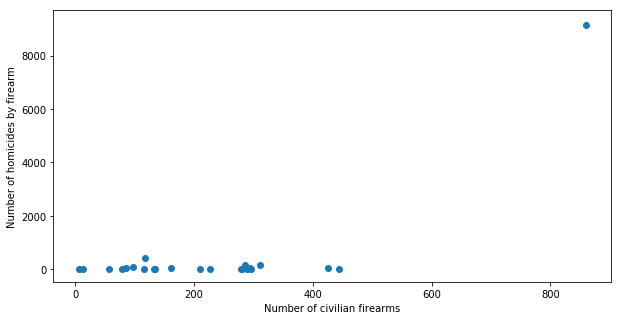

Number of homicides by firearm people vs number of civilian firearms, errors represent Poisson statistics.
The datapoint to the right of the plot is the USA, which has the highest number of civilian firearms and the highest number of homicides


In [119]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(fmo['Average total all civilian firearms']/ fmo['pop'] * 1000, fmo['Number of homicides by firearm'])
ax.errorbar(fmo['Average total all civilian firearms']/ fmo['pop'] * 1000, fmo['Number of homicides by firearm'], 
            yerr = np.sqrt(fmo['Number of homicides by firearm'] * 1.0), fmt = '.')
ax.set_xlabel("Number of civilian firearms")
ax.set_ylabel("Number of homicides by firearm")
ax.set_ylim()
pl.show()
print ("Number of homicides by firearm people vs number of civilian firearms, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the right of the plot is the USA, " + 
       "which has the highest number of civilian firearms and the highest number of homicides")


## 2.5. Plot the number of mass shootings against the number of civilian firearms. plot the US in a different color

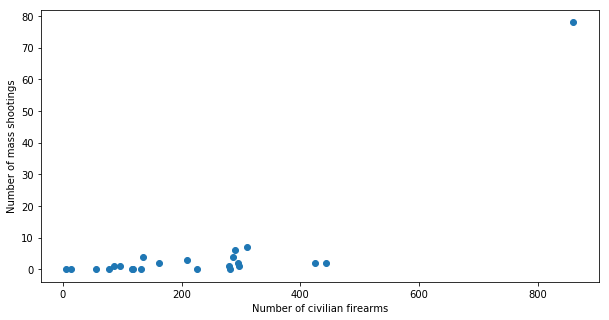

Number of mass shootings vs number of civilian firearms, with no error bars.
The datapoint to the right of the plot is the USA, which has the highest number of civilian firearms and the highest number of mass shootings


In [126]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(fmo['Average total all civilian firearms']/ fmo['pop'] * 1000, fmo['Number of mass shootings (1983-2013)'])
#ax.errorbar(fmo['Average total all civilian firearms']/ fmo['pop'] * 1000, fmo['Number of mass shootings (1983-2013)'], 
            #yerr = np.sqrt(fmo['Number of mass shootings (1983-2013)'] * 1.0), fmt = '.')
ax.set_xlabel("Number of civilian firearms")
ax.set_ylabel("Number of mass shootings")
ax.set_ylim()
pl.show()
print ("Number of mass shootings vs number of civilian firearms, " + 
       "with no error bars.\n" + 
       "The datapoint to the right of the plot is the USA, " + 
       "which has the highest number of civilian firearms and the highest number of mass shootings")

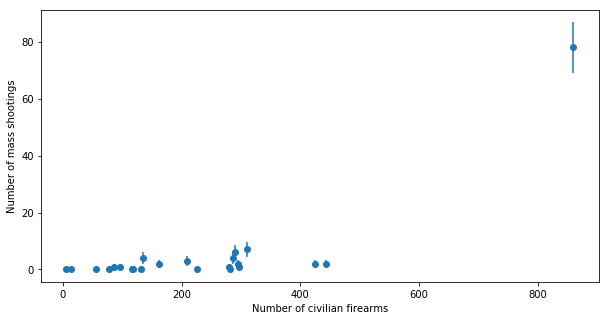

Number of mass shootings vs number of civilian firearms, errors represent Poisson statistics.
The datapoint to the right of the plot is the USA, which has the highest number of civilian firearms and the highest number of mass shootings


In [122]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(fmo['Average total all civilian firearms']/ fmo['pop'] * 1000, fmo['Number of mass shootings (1983-2013)'])
ax.errorbar(fmo['Average total all civilian firearms']/ fmo['pop'] * 1000, fmo['Number of mass shootings (1983-2013)'], 
            yerr = np.sqrt(fmo['Number of mass shootings (1983-2013)'] * 1.0), fmt = '.')
ax.set_xlabel("Number of civilian firearms")
ax.set_ylabel("Number of mass shootings")
ax.set_ylim()
pl.show()
print ("Number of mass shootings vs number of civilian firearms, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the right of the plot is the USA, " + 
       "which has the highest number of civilian firearms and the highest number of mass shootings")